# ORIE 4580/5580/5581 Assignment 2

#### Student: A. Gordon (alg332)

### Instructions


* Due Thursday September 11, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.

According to the Geometric distribution of $N_p$, the probability of $N_p = 1$ is p.
$p(1) = (1-p)^0 p = p$

If the first heads does not appear at the first toss, then it will appear at a number greater than 1. Since all tosses are independent, the distribution is memoryless and the next set of tosses will have the same distribution as $N_p$. Therefore it can be represented as $\tilde{N}_p$.

$\mathbb{E}[N_p] = p*1 + (1-p)*(1+\mathbb{E}[\tilde{N}_p]) = p + (1-p)*(1-\mathbb{E}[N_p])$

$\mathbb{E}[N_p] = 1 + (1-p)*\mathbb{E}[N_p]$

$(1-1+p)*\mathbb{E}[N_p] = 1 \implies \mathbb{E}[N_p] = \frac{1}{p}$

$\mathbb{E}[X^2] = p + (1-p)*\mathbb{E}[(1+N_p)^2] $

Use linearity of expectation to find the following:
$ \mathbb{E}[X^2] = p + (1-p)*(1+2*\mathbb{E}[N_p] +\mathbb{E}[N_p^2]) = \frac{2-p}{p^2}$

$Var(N_p) = \mathbb{E}[N_p^2] -\mathbb{E}[N_p]^2 = \frac{2-p}{p^2} - \frac{1}{p^2} = \frac{1-p}{p^2}$




___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans.
The mean and variance are the same.
$
\mathbb{E}[N_c] \;=\; \frac{n\pi}{4},
\qquad
\mathrm{Var}(N_c) \;=\; n \cdot \frac{\pi}{4}\left(1 - \frac{\pi}{4}\right).
$

The confidence interval for the first assignment was the following:

$
\hat{\pi} \;=\; 4\cdot\frac{N_c}{n}, \qquad
\mathrm{SE}(\hat{\pi}) \;\approx\; \sqrt{\frac{16}{n}\cdot \frac{\pi}{4}\left(1-\frac{\pi}{4}\right)}.
$

The formula does not depend on the (X,Y) coordinates. Therefore, the confidence interval will not decrease by switching methods.

---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

### Ans.

Define the following RV for if one person chooses a floor (i). The probability that everyone does not choose floor i is $\frac{4}{5}^4$ because everyone chooses floors independently.

$
X_i =
\begin{cases}
1 & \text{with probability} & 1-\frac{4}{5}^4 \\
0 & \text{otherwise}
\end{cases}
$

The RV representing the number of floors stopped at (X) is the following sum:

$X = \sum_{i=2}^{6} X_i$

$\mathbb{E}[X] = \sum_{i=2}^{6} \mathbb{E}[X_i]$

$\mathbb{E}[X] = \sum_{i=2}^{6}1-\frac{4}{5}^4$

$\mathbb{E}[X] = \sum_{i=2}^{6}0.5904$

$\mathbb{E}[X] = 2.952$

The elevator will stop at 2.952 floors on average.

---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.

Each person's friends are sampled from a discrete $U \sim Uniform(1,22,000)$. For any given person, the probability that I am friends with them is $\frac{500}{22,000}$ and for my friend it is $\frac{440}{22,000}$. The probability that we are both friends with that person is $\frac{500}{22,000} \cdot \frac{440}{22,000} = \frac{1}{2,200}. $ Now, multiply that probability by the number of people.

$\mathbb{E}[X] = 22,000*\frac{1}{2,200} = 10$


___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.

$(i)$ The samples can be assumed to be independent, since the people within n have litte contact. Therefore, the situation is governed by a Binomial distribution.

$\mathbb{P}(N = k) = \binom{n}{k} p^k (1-p)^{\,n-k}$

The mean and variance of which are given by:

$\mathbb{E}[N] = np, \mathrm{Var}(N) = np(1-p)$

$(ii)$ Since they are all in the same house, if any member has Covid, then the rest of the pool will have Covid. Therefore, N has the following distribution.

$ N =
\begin{cases} 0 & \text{with probability } (1-p)^n\\
  n & \text{with probability } 1-(1-p)^n \end{cases}$

$\mathbb{E}[N] = n-n(1-p)^n$

$\mathrm{Var}(N) = (n^2 - n)(1-(1-p)^2)$

___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.
T can only be 1 or 1+n, because if the pool test comes back positive, we need to individually test everyone. We are assuming that the test is accurate. Meaning that if the pool is negative, then we can be sure everyone in that pool does not have Covid and stop testing. Therefore, the distribution of T is the following.

$ T =
\begin{cases} 1 & \text{with probability } (1-p)^n\\
  1+n & \text{with probability } 1-(1-p)^n \end{cases}$

  $\mathbb{E}[T] = (1-p)^n + (1+n)*(1-(1-p)^n) = n+1-n(1-p)^n$

 $ \mathbb{E}[T^2] = (1-p)^n + (1+n)^2*(1-(1-p)^n) =  1 + (2n+n^2)(1-(1-p)^n)$

$\mathrm{Var}(T) = \mathbb{E}[T^2] - \mathbb{E}[T]^2 = 2n^2(1-p)^n-n^2(1-p)^n +n^2(1-p)^{2n} $


___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

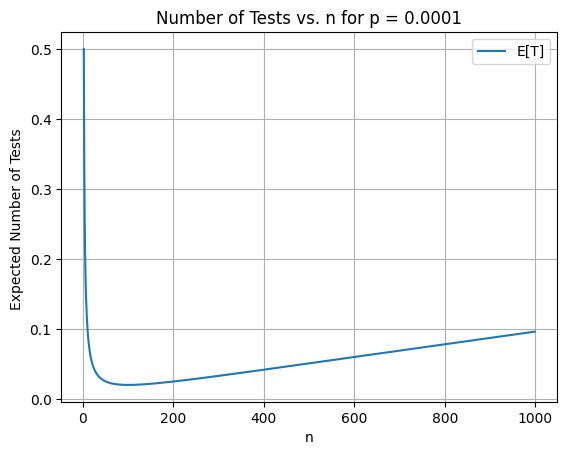

Minimizing n: 101


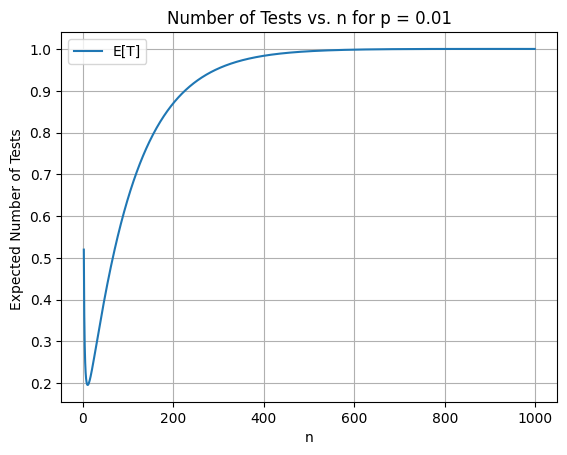

Minimizing n: 11


In [2]:
def plot_et(p):
  n_list = np.arange(2, 1000)
  e_t = []
  for n in n_list:
    #Average number of tests is E[T]/n
    e_t.append((n+1-n*(1-p)**n)/n)


  # Plot
  plt.plot(n_list, e_t, linestyle='-', label='E[T]')
  plt.xlabel("n")
  plt.ylabel("Expected Number of Tests ")
  plt.title(f"Number of Tests vs. n for p = {p}")
  plt.legend()
  plt.grid(True)
  plt.show()
  print("Minimizing n:", n_list[np.argmin(e_t)])
plot_et(.0001)
plot_et(.01)

### Ans.



The minimizing n for p = .0001 is 101 and the minimizing n for p = .01 is 11.



---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability $\mathbb{P}[\text{false positive test}|C]$ of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



### Ans.

The probability of a false negative will increase when there is a lower viral load (when V is smaller). A smaller V correlates to a higher cycle threshold C. Therfore, the correct probability will increase as C increases. Evaluate the two functions at various levels of C.

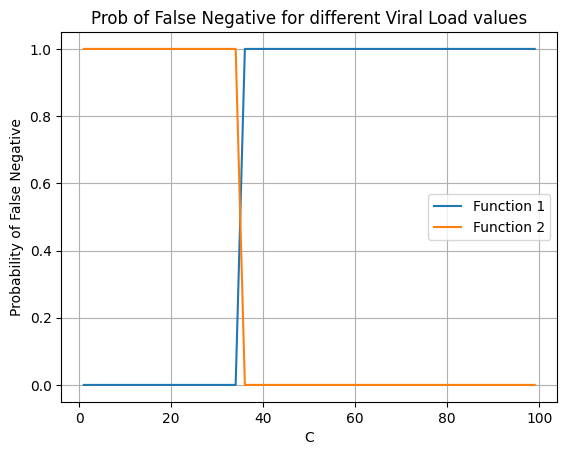

In [3]:
C = np.arange(1,100)
fun_1 = []
fun_2 = []
for c in C:
  fun_1.append(1/(1+np.exp(-10*(c-35))))
  fun_2.append(1/(1+np.exp(10*(c-35))))

plt.plot(C, fun_1, linestyle='-', label='Function 1')
plt.plot(C, fun_2, linestyle='-', label='Function 2')
plt.xlabel("C")
plt.ylabel("Probability of False Negative")
plt.title(f"Prob of False Negative for different Viral Load values")
plt.legend()
plt.grid(True)
plt.show()

As you can see, as the viral load increases, Function 1 increases. Therefore, the correct function is $\frac{1}{1 + \exp(-10(C - 35))}$.



---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is $\mathcal{N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is $\mathcal{N}(30, 3^2)$, and otherwise,  $C$ is $\mathcal{N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.



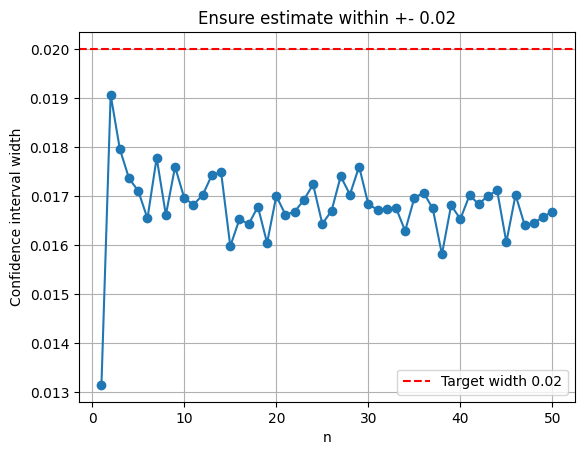

<Figure size 640x480 with 0 Axes>

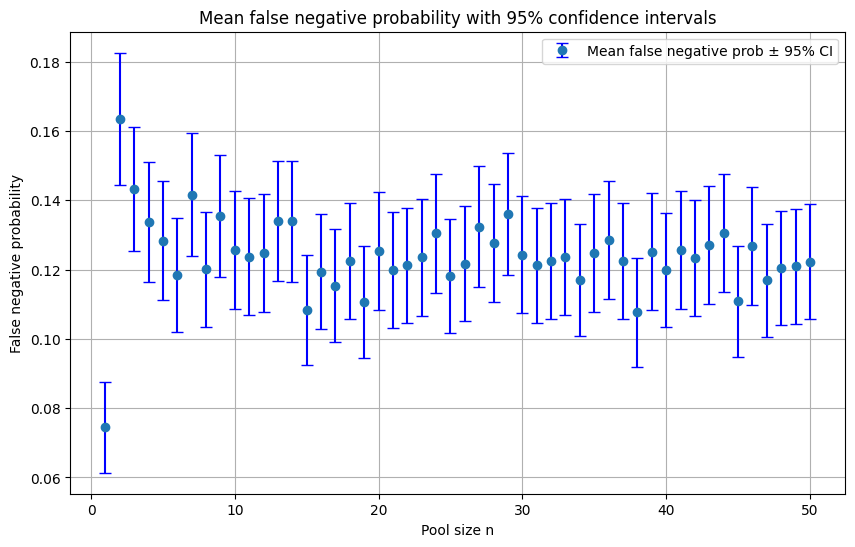

In [4]:

def false_negative_prob(C):
    return 1 / (1 + np.exp(-10 * (C - 35)))

#generate a 0,1 uniform RV to determine which Gaussian to follow.
def gaussian(u):
  if u <= 0.4:
      return np.random.normal(20, 3.5)
  elif u <= 0.9:
      return np.random.normal(30, 3)
  else:
      return np.random.normal(34.78, 1.32)

#define params
n_list = np.arange(1,51)
m = 1400 #replications of pooled test

#We know there is one positive person, should be positive.
#All people that do not have Covid have a C of 1.
n_probs = []
ci_lower = []
ci_upper = []
ci_widths = []

for n in n_list:
  all_probs = []
  for _ in range(1,m):
    u = np.random.rand()
    C = gaussian(u)
    #Each other person will contribute 2^-1 (1/2) since they are negative, there are n-1 others
    if n ==1:
      sample_c = C
    else:
      sample_c = -np.log2((1/n)*(1/2)*(n-1)*2**(-C))
    all_probs.append(false_negative_prob(sample_c))

  #Take the mean of the n simulations
  n_prob = np.mean(all_probs)
  n_probs.append(n_prob)


# 95% confidence interval using standard error
  se = np.std(all_probs, ddof=1) / np.sqrt(m)  # standard error
  ci_lower.append(n_prob - 1.96 * se)
  ci_upper.append(n_prob + 1.96 * se)
  ci_widths.append(1.96*se)


plt.plot(n_list, ci_widths, marker='o')
plt.axhline(y=0.02, color='red', linestyle='--', label='Target width 0.02')
plt.xlabel("n")
plt.ylabel("Confidence interval width")
plt.title(f"Ensure estimate within +- 0.02")
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
n_probs = np.array(n_probs)
ci_lower = np.array(ci_lower)
ci_upper = np.array(ci_upper)
ci_widths = np.array(ci_widths)

# Plot mean probabilities with error bars (confidence intervals)
plt.figure(figsize=(10,6))
plt.errorbar(n_list, n_probs, yerr=[n_probs - ci_lower, ci_upper - n_probs],
             fmt='o', ecolor='blue', capsize=4, label='Mean false negative prob ± 95% CI')
plt.xlabel("Pool size n")
plt.ylabel("False negative probability")
plt.title("Mean false negative probability with 95% confidence intervals")
plt.legend()
plt.grid(True)
plt.show()




## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

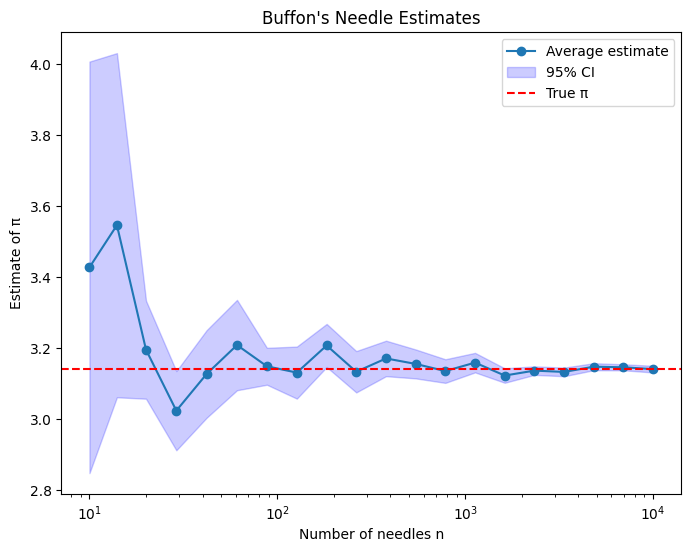

In [5]:


def buffon_trial(n, L=1, D=1):
  #do n trials of the buffon need drop
    # random angle between 0 and pi/2
    theta = np.random.uniform(0, np.pi/2, n)
    # distance from center of needle to nearest line
    x = np.random.uniform(0, D/2, n)
    # crossing if half-length * sin(theta) >= x
    crosses = (L/2) * np.sin(theta) >= x
    N_cross = np.sum(crosses)
    if N_cross == 0:
        return np.nan  # avoid division by zero
    return 2 * n / N_cross

# range of n values
n_values = np.logspace(1, 4, num=20, dtype=int)  # 10 to 10,000 (log-spaced)

means = []
lower = []
upper = []

reps = 30

for n in n_values:
    estimates = [buffon_trial(n) for _ in range(reps)]
    estimates = np.array([e for e in estimates if not np.isnan(e)])
    mean_est = np.mean(estimates)
    std_err = np.std(estimates, ddof=1) / np.sqrt(len(estimates))

    ci_low = mean_est - 1.96 * std_err
    ci_high = mean_est + 1.96 * std_err

    means.append(mean_est)
    lower.append(ci_low)
    upper.append(ci_high)

# plotting
plt.figure(figsize=(8,6))
plt.plot(n_values, means, marker='o', label='Average estimate')
plt.fill_between(n_values, lower, upper, color='blue', alpha=0.2, label='95% CI')
plt.axhline(np.pi, color='red', linestyle='--', label='True π')
plt.xscale('log')
plt.xlabel('Number of needles n')
plt.ylabel('Estimate of π')
plt.title("Buffon's Needle Estimates")
plt.legend()
plt.show()



---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.

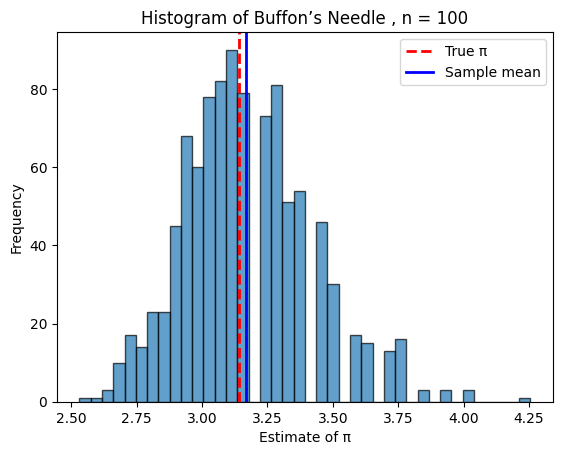

In [6]:
n_value = 100
experiments = 1000
estimates = [buffon_trial(n_value) for _ in range(experiments)]

plt.hist(estimates, bins=40, edgecolor='black', alpha=0.7)

plt.axvline(np.pi, color='red', linestyle='--', linewidth=2, label='True π')
plt.axvline(np.mean(estimates), color='blue', linestyle='-', linewidth=2, label='Sample mean')

plt.xlabel("Estimate of π")
plt.ylabel("Frequency")
plt.title("Histogram of Buffon’s Needle , n = 100")
plt.legend()
plt.show()

The sample mean is above the true value of $\pi$, meaning that the estimate is an overestimate.

**(c)** Can you mathematically justify your observation from part (b)?

### Ans.

The estimator $\hat{\pi}_n$ has an expected value of the following:

$ \mathbb{E} [\frac{2n}{N_{\text{cross}}}] = 2n\mathbb{E}[\frac{1}{N_{\text{cross}}}]$

Now use Jensen's inequality to find the following (since n is positive):
$2n\mathbb{E}[\frac{1}{N_{\text{cross}}}] \geq 2n\cdot \frac{1}{\mathbb{E}[N]}$

N is a binomial RV with expectation np, where p is the probability the needle crosses the line.
$2n\mathbb{E}[\frac{1}{N_{\text{cross}}}] \geq 2n\cdot \frac{1}{n*\frac{2}{\pi}}$

$2n\mathbb{E}[\frac{1}{N_{\text{cross}}}] \geq \pi$

Meaning the expectation of the estimator for pi will have a greater value than the true value.

**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

In [7]:
def buffon_experiment(n_trials=100000, needle_length=1.0, line_spacing=1.0):
    theta = np.random.uniform(0, np.pi/2, size=n_trials)
    y = np.random.uniform(0, line_spacing/2, size=n_trials)
    crosses = (y <= (needle_length/2) * np.sin(theta))
    N_cross = np.sum(crosses)

    p_hat = N_cross / n_trials
    return p_hat, N_cross, n_trials

# Run experiment
p_hat, N_cross, n = buffon_experiment(200000)

# 95% CI for p = P(cross)
se = np.sqrt(p_hat * (1 - p_hat) / n)
p_L, p_U = p_hat - 1.96 * se, p_hat + 1.96 * se

# Map to CI for pi, as the true probability is 2/pi
pi_est = 2 / p_hat
pi_L, pi_U = 2 / p_U, 2 / p_L

print(f"Estimated p: {p_hat:.5f}")
print(f"95% CI for p: ({p_L:.5f}, {p_U:.5f})")
print(f"Estimated π: {pi_est:.5f}")
print(f"95% CI for π: ({pi_L:.5f}, {pi_U:.5f})")




Estimated p: 0.63806
95% CI for p: (0.63595, 0.64016)
Estimated π: 3.13453
95% CI for π: (3.12421, 3.14491)


**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.

This situation is governed by the Binomial distribution.

$ X \sim Binomial(1600,0.95) $

Now, use the CDF of the binomial to find the probability that you see > 1500 people enter the theater. The CDF represents P(x <=1500). Therefore, 1 - CDF will give the probability of greater than 1500 people arriving. Using the code below, that probability is 98.5%.

In [8]:
from scipy.stats import binom

n = 1600
p = 0.95
k = 1500

# CDF P(X <= k)
cdf_value = binom.cdf(k, n, p)
print("P(X > 1500) =", 1-cdf_value)

P(X > 1500) = 0.9851873005822535


**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns 100 in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of 500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1600) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

### Ans.

The code below performs the simulation and determines that ticketmaster will sell 70 extra tickets.

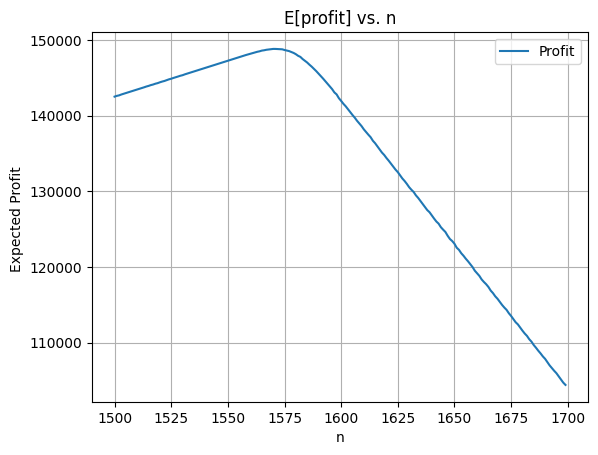

Max n: 1570


In [9]:


#Function calculating the expected profit for ticketmaster, for one n
def expected_profit(realizations, f):
  profits = 100 * realizations
  for r in range(len(profits)):
    if realizations[r] > 1500:
      profits[r] = profits[r] -f*(realizations[r] - 1500)
  profits = np.array(profits)
  return np.mean(profits)

p = .95
simulations = 10000

#Calculate the expected profit for ticketmaster for each ticket sold above 1500
exp_profits = []
for n in range(1500, 1700):
  X = np.random.binomial(n, p, size=simulations)
  exp_profits.append(expected_profit(X,500))

#Plot the function
exp_profits = np.array(exp_profits)
n_list = np.arange(1500, 1700)
plt.plot(n_list, exp_profits, linestyle='-', label='Profit')
plt.xlabel("n")
plt.ylabel("Expected Profit ")
plt.title(f"E[profit] vs. n")
plt.legend()
plt.grid(True)
plt.show()
print("Max n:", n_list[np.argmax(exp_profits)])




**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1600$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.

In [10]:
f = 10_000
while True:
  p = .95
  simulations = 100

  #Calculate the expected profit for ticketmaster for each ticket sold above 1500
  exp_profits = []
  for n in range(1, 1700):
    X = np.random.binomial(n, p, size=simulations)
    exp_profits.append(expected_profit(X,f))

  n_list = np.arange(1, 1700)
  extra = n_list[np.argmax(exp_profits)] - 1500

  if extra <10:
    print("Charge the following:", f)

    break

  f+=100



KeyboardInterrupt: 

It appears that there is no fine that is large enough to prevent overbooking by a single ticket. The above code was run and the minimum optimal overbooking was found to be 50 tickets.